In [ ]:
########################################################
########################################################
####################### Figure 1 #######################
########################################################
########################################################

In [1]:
########################################################
#### Figure 1B (variance component analysis)

In [2]:
vd_filename <- "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/variance_decomposition/sce_merged_afterqc_filt_allexpts_exprs_20180618.var_decomp.5000cells.15experiments.seed0.tsv"

In [3]:
vd <- read.csv(vd_filename, row.names = 1)
head(vd[,1:4])

,donor_long_id,experiment,day,residual
,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000153982_GDPD1,0.007621973,6.985467e-04,0.024658028,0.9670215
ENSG00000154040_CABYR,0.007234918,6.736626e-03,0.012741225,0.9732872
ENSG00000154080_CHST9,0.002848415,3.307531e-03,0.031483258,0.9623608
ENSG00000154096_THY1,0.028380478,6.486298e-02,0.324306667,0.5824499
ENSG00000154102_C16orf74,0.018645116,3.220612e-05,0.002999832,0.9783228
ENSG00000154134_ROBO3,0.012450225,5.980282e-03,0.004190336,0.9773792


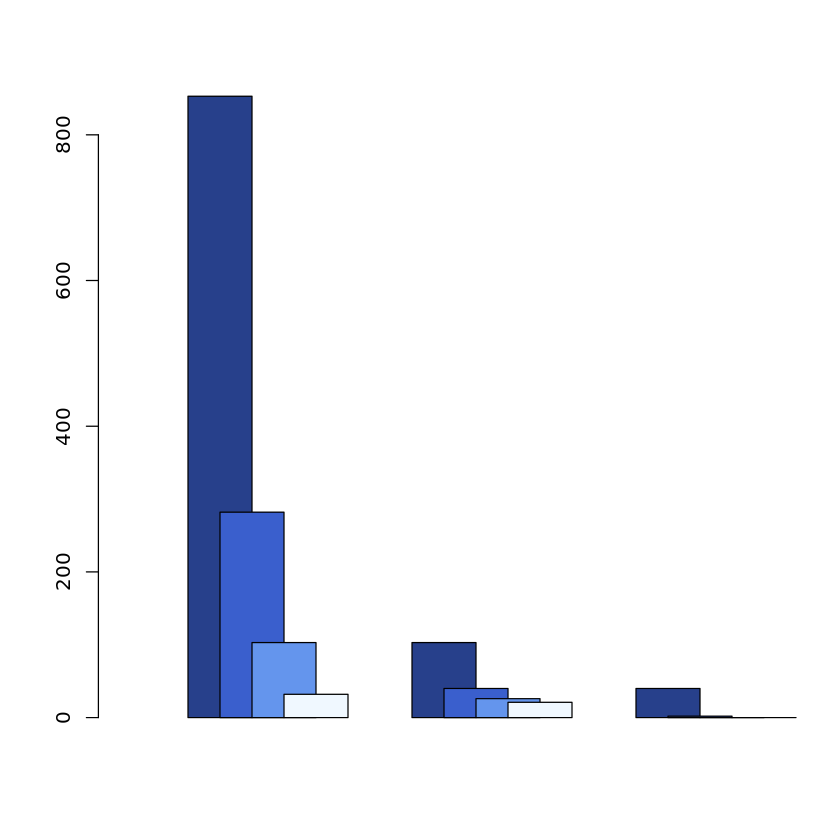

In [4]:
options(repr.plot.width = 7, repr.plot.height = 7)
bars <- c(nrow(vd[vd$day > 0.1,]), nrow(vd[vd$day > 0.2,]), nrow(vd[vd$day > 0.3,]),nrow(vd[vd$day > 0.4,]),
         nrow(vd[vd$donor_long_id > 0.1,]), nrow(vd[vd$donor_long_id > 0.2,]), nrow(vd[vd$donor_long_id > 0.3,]),
          nrow(vd[vd$donor_long_id > 0.4,]),
         nrow(vd[vd$experiment > 0.1,]), nrow(vd[vd$experiment > 0.2,]), nrow(vd[vd$experiment > 0.3,]),
          nrow(vd[vd$experiment > 0.4,]))


my.xlim = c(0, 850)
my.ylim = c(0,10)
my.space = c(1, -0.5, -0.5, -0.5, 1, -0.5, -0.5, -0.5, 1, -0.5, -0.5, -0.5)

# opar <- par(lwd = 5)
barplot(as.numeric(bars), 
#         border = c("dodgerblue4","dodgerblue","cornflowerblue","aliceblue",
#                 "dodgerblue4","dodgerblue","cornflowerblue","aliceblue",
#                 "dodgerblue4","dodgerblue","cornflowerblue","aliceblue"),
        col = c("royalblue4","royalblue3","cornflowerblue","aliceblue",
                "royalblue4","royalblue3","cornflowerblue","aliceblue",
                "royalblue4","royalblue3","cornflowerblue","aliceblue"),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


In [6]:
##### save

In [5]:
svg(filename="/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/main_figures/figure1B.svg", 
    width=7, 
    height=7, 
    pointsize=12)



# opar <- par(lwd = 5)
barplot(as.numeric(bars), 
#         border = c("dodgerblue4","dodgerblue","cornflowerblue","aliceblue",
#                 "dodgerblue4","dodgerblue","cornflowerblue","aliceblue",
#                 "dodgerblue4","dodgerblue","cornflowerblue","aliceblue"),
        col = c("royalblue4","royalblue3","cornflowerblue","aliceblue",
                "royalblue4","royalblue3","cornflowerblue","aliceblue",
                "royalblue4","royalblue3","cornflowerblue","aliceblue"),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")#, 

dev.off()

png 
  2

In [ ]:
########################################################
#### Figure 1C (PCA)

In [35]:
library(ggplot2)
library(ggthemes)

In [36]:
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [37]:
sce

class: SingleCellExperiment 
dim: 11231 36044 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(36044): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC

In [38]:
pca.500hvgs = prcomp(t(logcounts(sce[rowData(sce)$is_intop500hvg,])))

In [39]:
pca.set = pca.500hvgs
df = data.frame(PC1 = pca.set$x[,1], PC2 = pca.set$x[,2], day = sce$day)
df = as.data.frame(cbind(df, colData(sce)))
# colnames(df)

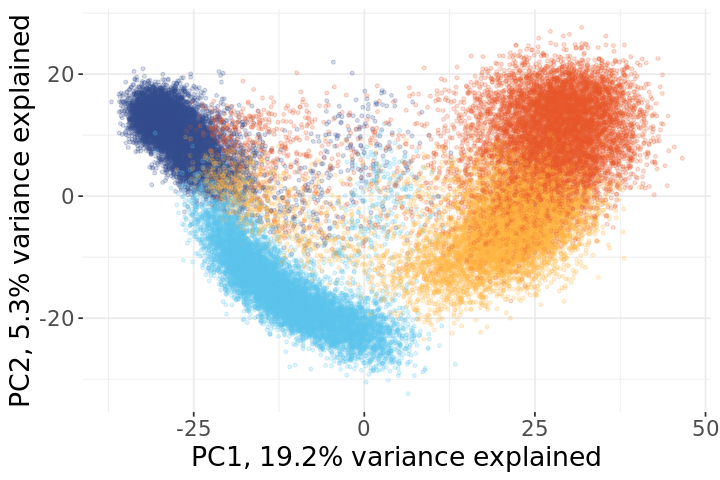

In [40]:
perc_var <- round(summary(pca.set)$importance[2,]*100, 1)
p = ggplot(df, aes(x = as.numeric(PC1), y = as.numeric(PC2), colour = as.factor(day)))
p = p + geom_point(alpha = 0.2, size = 0.8) #+ ggtitle("PCA, top 500 hvgs")
p = p + scale_color_canva(palette = "Pool party") 
p = p + theme_bw() + theme(legend.position = "none", panel.border = element_blank(), text = element_text(size = 16))
p = p + xlab(paste0("PC1, ",perc_var[1],"% variance explained")) 
p = p + ylab(paste0("PC2, ",perc_var[2],"% variance explained"))
options(repr.plot.width = 6, repr.plot.height = 4)
p

In [41]:
##### save

In [12]:
svg(filename="/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/main_figures/figure1C.svg", 
    width=6, 
    height=4, 
    pointsize=12)

perc_var <- round(summary(pca.set)$importance[2,]*100, 1)
p = ggplot(df, aes(x = as.numeric(PC1), y = as.numeric(PC2), colour = as.factor(day)))
p = p + geom_point(alpha = 0.2, size = 0.8) #+ ggtitle("PCA, top 500 hvgs")
p = p + scale_color_canva(palette = "Pool party") 
p = p + theme_bw() + theme(legend.position = "none", panel.border = element_blank(), text = element_text(size = 16))
p = p + xlab(paste0("PC1, ",perc_var[1],"% variance explained")) 
p = p + ylab(paste0("PC2, ",perc_var[2],"% variance explained"))
plot(p) 

dev.off()

png 
  2

In [ ]:
########################################################
#### Figure 1D (pseudo x markers)

In [78]:
library(cowplot)

In [79]:
diff_genes_reduced = c("ENSG00000111704_NANOG", "ENSG00000164458_T", "ENSG00000163508_EOMES", "ENSG00000141448_GATA6")

In [80]:
range01 <- function(x){(x-min(x))/(max(x)-min(x))}

In [81]:
df = data.frame(cell = sce$cell_name, day = sce$day, expt = sce$experiment, donor = sce$donor, 
                pseudo = range01(sce$PC1_top500hvgs)) 

In [82]:
plist = list()
for (i in 1:length(diff_genes_reduced)){
    gene = diff_genes_reduced[i]
    df$gene = logcounts(sce)[gene,]
    plist[[i]] = ggplot(df, aes(x = as.numeric(pseudo), y = as.numeric(gene), colour = as.factor(day))) + 
            geom_point(alpha = 0.2, pch = 20) 
}

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


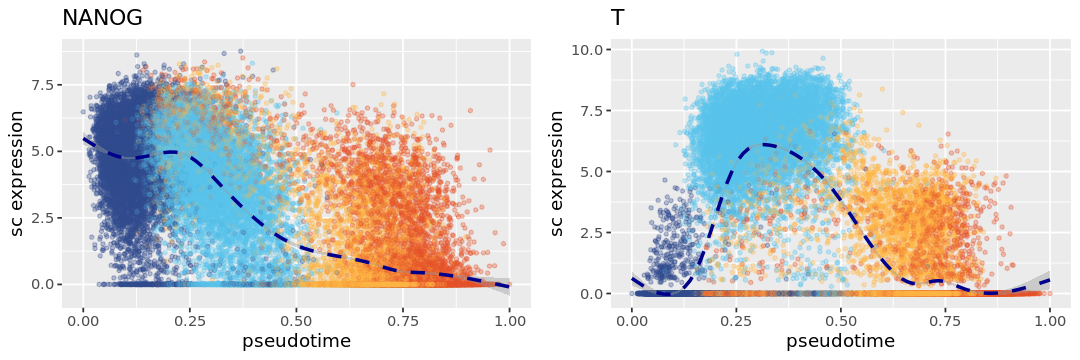

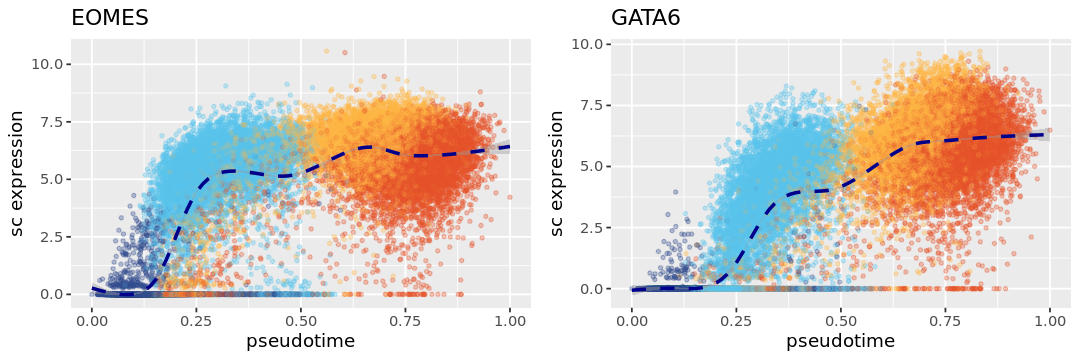

In [83]:
options(repr.plot.width = 9, repr.plot.height = 3) 
plist = plist
for (j in seq(2, length(diff_genes_reduced), by = 2)){
    p1 = plist[[j-1]]
    p1 = p1 + ggtitle(gsub(".*_","",diff_genes_reduced[j-1])) + 
         xlab("pseudotime") + ylab("sc expression") + labs(colour = "day") + 
        scale_color_canva(palette = "Pool party") + geom_point(alpha = 0.15, pch = 20) +
        stat_smooth(colour = "darkblue", linetype = 2)+  
        theme(legend.position="none", panel.border = element_blank())
    p2 = plist[[j]]
    p2 = p2 + ggtitle(gsub(".*_","",diff_genes_reduced[j])) + 
        xlab("pseudotime") + ylab("sc expression") + labs(colour = "day") + 
        scale_color_canva(palette = "Pool party") + geom_point(alpha = 0.15, pch = 20) +
        stat_smooth(colour = "darkblue", linetype = 2) + 
        theme(legend.position="none", panel.border = element_blank())
    print(plot_grid(p1, p2, ncol = 2))
}

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


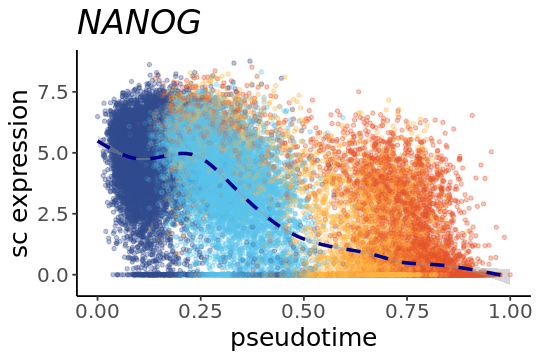

In [100]:
i = 1
gene = diff_genes_reduced[i]
df$gene = logcounts(sce)[gene,]
p = ggplot(df, aes(x = as.numeric(pseudo), y = as.numeric(gene), colour = as.factor(day))) + 
            geom_point(alpha = 0.2, pch = 20)
options(repr.plot.width = 4.5, repr.plot.height = 3) 
p = p + ggtitle(gsub(".*_","",diff_genes_reduced[i])) + 
         xlab("pseudotime") + ylab("sc expression") + labs(colour = "day") + 
        scale_color_canva(palette = "Pool party") + geom_point(alpha = 0.15, pch = 20) +
        stat_smooth(colour = "darkblue", linetype = 2)+  
        theme(legend.position="none", panel.border = element_blank())
p = p + theme_classic() + theme(legend.position="none", plot.title = element_text(face = "italic", size = 20))
p1 = p + theme(text = element_text(size = 15))
p1

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


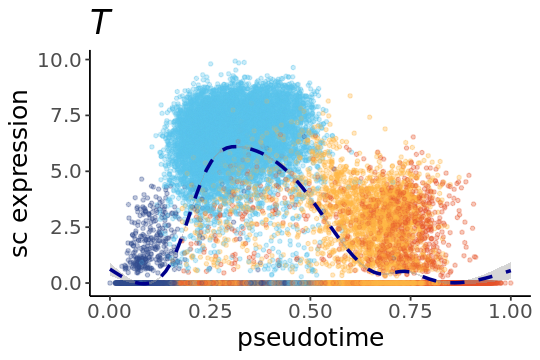

In [99]:
i = 2
gene = diff_genes_reduced[i]
df$gene = logcounts(sce)[gene,]
p = ggplot(df, aes(x = as.numeric(pseudo), y = as.numeric(gene), colour = as.factor(day))) + 
            geom_point(alpha = 0.2, pch = 20)
options(repr.plot.width = 4.5, repr.plot.height = 3) 
p = p + ggtitle(gsub(".*_","",diff_genes_reduced[i])) + 
         xlab("pseudotime") + ylab("sc expression") + labs(colour = "day") + 
        scale_color_canva(palette = "Pool party") + geom_point(alpha = 0.15, pch = 20) +
        stat_smooth(colour = "darkblue", linetype = 2)+  
        theme(legend.position="none", panel.border = element_blank())
p = p + theme_classic() + theme(legend.position="none", plot.title = element_text(face = "italic", size = 20))
p2 = p + theme(text = element_text(size = 15))
p2

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


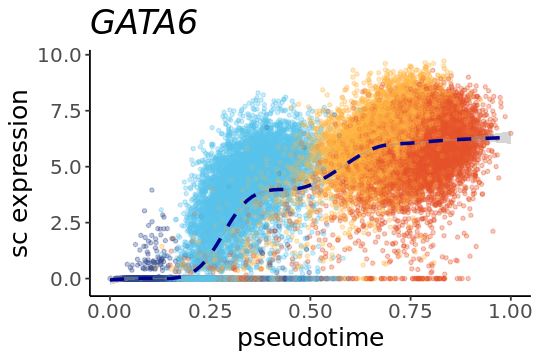

In [98]:
i = 4
gene = diff_genes_reduced[i]
df$gene = logcounts(sce)[gene,]
p = ggplot(df, aes(x = as.numeric(pseudo), y = as.numeric(gene), colour = as.factor(day))) + 
            geom_point(alpha = 0.2, pch = 20)
options(repr.plot.width = 4.5, repr.plot.height = 3) 
p = p + ggtitle(gsub(".*_","",diff_genes_reduced[i])) + 
         xlab("pseudotime") + ylab("sc expression") + labs(colour = "day") + 
        scale_color_canva(palette = "Pool party") + geom_point(alpha = 0.15, pch = 20) +
        stat_smooth(colour = "darkblue", linetype = 2)+  
        theme(legend.position="none", panel.border = element_blank())
p = p + theme_classic() + theme(legend.position="none", plot.title = element_text(face = "italic", size = 20))
p3 = p + theme(text = element_text(size = 15))
p3

In [ ]:
##### save

In [101]:
svg(filename="/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/main_figures/figure1D_NANOG_bis.svg", 
    width=4.5, 
    height=3, 
    pointsize=12)
p1 
dev.off()
##
svg(filename="/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/main_figures/figure1D_T_bis.svg", 
    width=4.5, 
    height=3, 
    pointsize=12)
p2
dev.off()
##
svg(filename="/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/main_figures/figure1D_GATA6_bis.svg", 
    width=4.5, 
    height=3, 
    pointsize=12)
p3
dev.off()

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


png 
  2

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


png 
  2

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


png 
  2

In [ ]:
########################################################
########################################################
####################### Figure 2 #######################
########################################################
########################################################

In [ ]:
#### Figure 2A (violins)

In [ ]:
##### save

In [ ]:
#### Figure 2B (stages, days)

In [ ]:
### not ideal but okay for now

In [298]:
col_day0 = canva_pal("Pool party")(4)[1]
col_day1 = canva_pal("Pool party")(4)[2]
col_day2 = canva_pal("Pool party")(4)[3]
col_day3 = canva_pal("Pool party")(4)[4]

col_ips = canva_pal("Modern and clean")(4)[2]
col_mesendo = canva_pal("Modern and clean")(4)[4]
col_defendo = canva_pal("Warm tones")(4)[3]

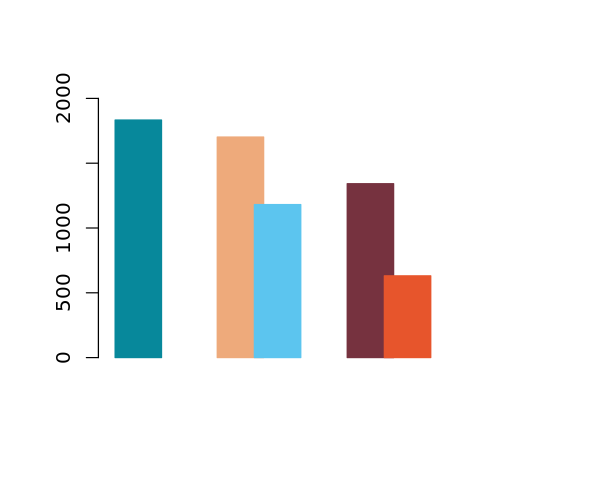

In [299]:
options(repr.plot.width = 5, repr.plot.height = 4)
eqtls <- c(1833, 1702, 1181, 1342, 631)


my.xlim = c(0, 2000)
my.ylim = c(0,9)
my.space = c(0, 1.2, -0.2, 1, -0.2)

# opar <- par(lwd = 5)
barplot(as.numeric(eqtls), 
        border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
#         col = "white",
        col = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


In [ ]:
##### save

In [300]:
svg(filename="/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/main_figures/figure_2B_Rplot.svg", 
    width=5, 
    height=4, 
    pointsize=12)

barplot(as.numeric(eqtls), 
        border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
#         col = "white",
        col = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")

dev.off()

png 
  2

In [ ]:
########################

In [ ]:
#### Figure 2C (shared, one stage)

In [282]:
# # load full list of results sc stages (iPS, mesendo, defendo)
# res.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/allresults.csv", row.names = 1)
# res.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/allresults.csv", row.names = 1)
# res.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/allresults.csv", row.names = 1)

In [283]:
# load lead variant results sc stages (iPS, mesendo, defendo)
leads.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/leads.csv", row.names = 1)
leads.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/leads.csv", row.names = 1)
leads.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/leads.csv", row.names = 1)

In [284]:
leads.ips.sign = leads.ips[leads.ips$global_corr_p_value < 0.1,]
nrow(leads.ips.sign)

[1] 1833

In [285]:
leads.mes.sign = leads.mes[leads.mes$global_corr_p_value < 0.1,]
nrow(leads.mes.sign)

[1] 1702

In [286]:
leads.defendo.sign = leads.defendo[leads.defendo$global_corr_p_value < 0.1,]
nrow(leads.defendo.sign)

[1] 1342

In [287]:
RankAndKeepTop <- function(leads){
    leads1 = leads[order(leads$global_corr_p_value),]
    leads2 = leads1[-which(duplicated(leads1$feature)),]  
    leads2
}

In [288]:
### inner join significant sc iPS leads, all results from sc mesendo leads
leads.ips.in.me = left_join(leads.ips.sign, res.mes, by = c("snp_id","feature"), 
                            suffix = c(".ips",".me"))
# nrow(leads.ips.in.me)
leads.ips.in.me = RankAndKeepTop(leads.ips.in.me)
# nrow(leads.ips.in.me)
### inner join significant sc iPS leads and mesenso, all results from sc defendo leads
leads.ips.in.me.in.de = left_join(leads.ips.in.me, res.defendo, by = c("snp_id","feature","ensembl_gene_id"))
# colnames(leads.ips.in.me.in.de)
# nrow(leads.ips.in.me.in.de)
leads.ips.in.me.in.de = RankAndKeepTop(leads.ips.in.me.in.de)
# nrow(leads.ips.in.me.in.de)
ips = leads.ips.in.me.in.de
ips$p_value.de = ips$p_value
ips$beta.de = ips$beta
ips = ips[!(is.na(ips$p_value.me)) & !(is.na(ips$p_value.de)),]
nrow(ips[(ips$p_value.me >= 0.05) & (ips$p_value.de >= 0.05),])
nrow(ips[((ips$p_value.me >= 0.05) & (ips$p_value.de < 0.05)),])
nrow(ips[((ips$p_value.de >= 0.05) & (ips$p_value.me < 0.05)),])
nrow(ips[((ips$p_value.me >= 0.05) & (ips$p_value.de < 0.05)) | ((ips$p_value.me < 0.05) & (ips$p_value.de >= 0.05)),])
nrow(ips[(ips$p_value.me < 0.05) & (ips$p_value.de < 0.05),])

[1] 468

[1] 182

[1] 287

[1] 469

[1] 681

In [289]:
### inner join significant sc mesendo leads, all results from sc iPSC leads
leads.me.in.ips = left_join(leads.mes.sign, res.ips, by = c("snp_id","feature"), 
                            suffix = c(".me",".ips"))
# nrow(leads.me.in.ips)
leads.me.in.ips = RankAndKeepTop(leads.me.in.ips)
nrow(leads.me.in.ips)
# ### inner join significant sc mesendo leads and iPS, all results from sc defendo leads
leads.me.in.ips.in.de = left_join(leads.me.in.ips, res.defendo, by = c("snp_id","feature","ensembl_gene_id"))
# # nrow(leads.me.in.ips.in.de)
leads.me.in.ips.in.de = RankAndKeepTop(leads.me.in.ips.in.de)
# # nrow(leads.me.in.ips.in.de)
mesendo = leads.me.in.ips.in.de
mesendo$p_value.de = mesendo$p_value
mesendo$beta.de = mesendo$beta
mesendo = mesendo[!(is.na(mesendo$p_value.ips)) & !(is.na(mesendo$p_value.de)),]
nrow(mesendo[(mesendo$p_value.ips >= 0.05) & (mesendo$p_value.de >= 0.05),])
nrow(mesendo[((mesendo$p_value.ips >= 0.05) & (mesendo$p_value.de < 0.05)),])
nrow(mesendo[((mesendo$p_value.de >= 0.05) & (mesendo$p_value.ips < 0.05)),])
nrow(mesendo[((mesendo$p_value.ips >= 0.05) & (mesendo$p_value.de < 0.05)) | ((mesendo$p_value.ips < 0.05) & (mesendo$p_value.de >= 0.05)),])
nrow(mesendo[(mesendo$p_value.ips < 0.05) & (mesendo$p_value.de < 0.05),])

[1] 1679

[1] 455

[1] 100

[1] 278

[1] 378

[1] 592

In [290]:
### inner join significant sc defendo leads, all results from sc iPSC leads
leads.de.in.ips = left_join(leads.defendo.sign, res.ips, by = c("snp_id","feature"), 
                            suffix = c(".de",".ips"))
# nrow(leads.de.in.ips)
leads.de.in.ips = RankAndKeepTop(leads.de.in.ips)
nrow(leads.de.in.ips)
# ### inner join significant sc defendo leads and iPS, all results from sc mesendo leads
leads.de.in.ips.in.me = left_join(leads.de.in.ips, res.mes, by = c("snp_id","feature","ensembl_gene_id"))
# # nrow(leads.de.in.ips.in.me)
leads.de.in.ips.in.me = RankAndKeepTop(leads.de.in.ips.in.me)
# # nrow(leads.de.in.ips.in.me)
defendo = leads.de.in.ips.in.me
defendo$p_value.me = defendo$p_value
defendo$beta.me = defendo$beta
defendo = defendo[!(is.na(defendo$p_value.ips)) & !(is.na(defendo$p_value.me)),]
nrow(defendo[(defendo$p_value.ips >= 0.05) & (defendo$p_value.me >= 0.05),])
nrow(defendo[((defendo$p_value.ips >= 0.05) & (defendo$p_value.me < 0.05)),])
nrow(defendo[((defendo$p_value.me >= 0.05) & (defendo$p_value.ips < 0.05)),])
nrow(defendo[((defendo$p_value.ips >= 0.05) & (defendo$p_value.me < 0.05)) | ((defendo$p_value.ips < 0.05) & (defendo$p_value.me >= 0.05)),])
nrow(defendo[(defendo$p_value.ips < 0.05) & (defendo$p_value.me < 0.05),])

[1] 1322

[1] 435

[1] 115

[1] 138

[1] 253

[1] 590

In [291]:
col_day0 = canva_pal("Pool party")(4)[1]
col_day1 = canva_pal("Pool party")(4)[2]
col_day2 = canva_pal("Pool party")(4)[3]
col_day3 = canva_pal("Pool party")(4)[4]

col_ips = canva_pal("Modern and clean")(4)[2]
col_mesendo = canva_pal("Modern and clean")(4)[4]
col_defendo = canva_pal("Warm tones")(4)[3]

# col_ips = canva_pal("Vintage charm")(4)[1]
# col_mesendo = canva_pal("Vintage charm")(4)[4]
# col_defendo = canva_pal("Vintage charm")(4)[2]

# col_ips = canva_pal("Pastels")(4)[1]
# col_mesendo = canva_pal("Pastels")(4)[4]
# col_defendo = canva_pal("Pastels")(4)[2]

# col_ips = "cornflowerblue"
# col_mesendo = "forestgreen"
# col_defendo = "coral"

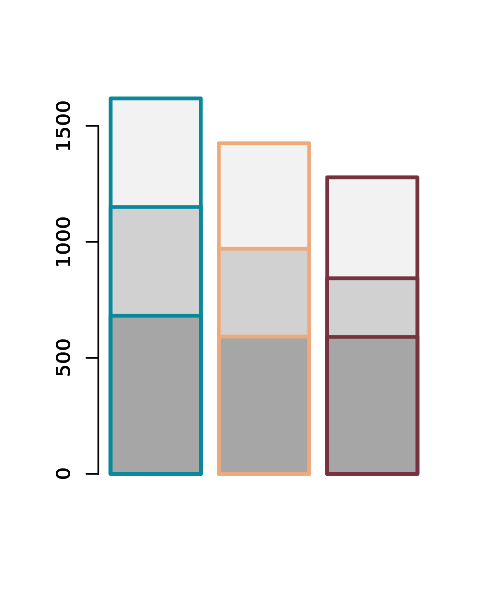

In [292]:
options(repr.plot.width = 4, repr.plot.height = 5)
opar <- par(lwd = 3)
barplot(c(1618,1425,1278), col = "gray95", border = c(col_ips, col_mesendo, col_defendo), axes = 3)
barplot(c(1150,970,843), col = "gray82", border = c(col_ips, col_mesendo, col_defendo), add = T)
barplot(c(681,592,590), col = "gray65", border = c(col_ips, col_mesendo, col_defendo), add = T)

In [ ]:
##### save

In [293]:
svg(filename="/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/main_figures/figure_2C_Rplot.svg", 
    width=4, 
    height=5, 
    pointsize=12)

opar <- par(lwd = 3)
barplot(c(1618,1425,1278), col = "gray95", border = c(col_ips, col_mesendo, col_defendo), axes = 3)
barplot(c(1150,970,843), col = "gray82", border = c(col_ips, col_mesendo, col_defendo), add = T)
barplot(c(681,592,590), col = "gray65", border = c(col_ips, col_mesendo, col_defendo), add = T)

dev.off()

png 
  2

In [ ]:
########################

In [ ]:
#### Figure 2D (lead switch)

In [54]:
res.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/allresults.csv", row.names = 1)
res.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/allresults.csv", row.names = 1)
res.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/allresults.csv", row.names = 1)

In [58]:
col_day0 = canva_pal("Pool party")(4)[1]
col_day1 = canva_pal("Pool party")(4)[2]
col_day2 = canva_pal("Pool party")(4)[3]
col_day3 = canva_pal("Pool party")(4)[4]

col_ips = canva_pal("Modern and clean")(4)[2]
col_mesendo = canva_pal("Modern and clean")(4)[4]
col_defendo = canva_pal("Warm tones")(4)[3]

In [64]:
selftag_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/qtl_annotation/all_results_combined.self_tagging.endodiff_donor_ref.txt"
selftag = read.csv(selftag_filename, sep = "\t", row.names = 1)

In [65]:
# retain only genes that are present more than once
dupl = selftag[selftag$feature %in% selftag$feature[duplicated(selftag$feature)],]
dim(selftag)
dim(dupl)

[1] 4824   31

[1] 2677   31

In [66]:
dupl = dupl[order(dupl$feature),]
head(dupl)

,beta.mean,beta_se,empirical_feature_p_value,p_value.mean,snp_id,feature,global_corr_p_value,snp_chromosome,snp_position,ref_allele,⋯,stage,sign.mean,stage_specific,p_value.int,q_value,beta.int,sign.int,GWAS_Variant,GWAS_Annotation,GWAS_LD
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1105,-0.2962102,0.06745771,6.815066e-04,1.128044e-05,7_91764128_C_A,ENSG00000001630_CYP51A1,0.0092285559,7,91764128,C,⋯,mesendo,True,False,2.117326e-03,2.274699e-03,-9.196375e-04,True,{7_91764128};{7_91643402},{7_91764128_C_A:mesendo:ENSG00000001630_CYP51A1};{7_91643402_G_T:ips:ENSG00000001630_CYP51A1},{1.0};{0.5915537531854735}
3652,-0.1922148,0.06100889,2.122657e-02,1.629340e-03,7_91643402_G_T,ENSG00000001630_CYP51A1,0.0946862109,7,91643402,G,⋯,ips,True,False,NA,NA,NA,,{7_91764128};{7_91643402},{7_91764128_C_A:mesendo:ENSG00000001630_CYP51A1};{7_91643402_G_T:ips:ENSG00000001630_CYP51A1},{0.5915537531854735};{0.9999999999999999}
3383,0.4542769,0.10175926,4.998896e-03,8.035653e-06,12_1058688_A_C,ENSG00000002016_RAD52,0.0343612783,12,1058688,A,⋯,ips,True,False,9.554530e-01,3.289896e-01,-1.863243e-05,False,{12_1058688},{12_1058688_A_C:ips:ENSG00000002016_RAD52},{0.9999999999999998}
4009,0.4526755,0.10683039,1.917074e-03,2.261946e-05,12_1021159_C_T,ENSG00000002016_RAD52,0.0203119606,12,1021159,C,⋯,mesendo,True,False,NA,NA,NA,,{12_1021159},{12_1021159_C_T:mesendo:ENSG00000002016_RAD52},{0.9999999999999998}
422,0.6751852,0.13803669,1.885308e-05,1.001488e-06,16_90063890_T_G,ENSG00000003249_DBNDD1,0.0006499914,16,90063890,T,⋯,defendo,True,False,2.242526e-08,6.468193e-08,2.419779e-03,True,{16_90100471};{16_90063890};{16_90026512},{16_90100471_T_C:mesendo:ENSG00000003249_DBNDD1};{16_90063890_T_G:defendo:ENSG00000003249_DBNDD1};{16_90026512_T_C:defendo:ENSG00000141013_GAS8},{0.5812049576028244};{0.9999999999999998};{0.3536498355245956}
4252,0.5177406,0.13384554,1.522025e-02,1.096440e-04,16_90100471_T_C,ENSG00000003249_DBNDD1,0.0811036063,16,90100471,T,⋯,mesendo,True,False,NA,NA,NA,,{16_90100471};{16_90063890},{16_90100471_T_C:mesendo:ENSG00000003249_DBNDD1};{16_90063890_T_G:defendo:ENSG00000003249_DBNDD1},{1.0};{0.5812049576028244}


In [67]:
dupl$eQTL = gsub("\\}","",gsub("\\{","",gsub(":ips:","-",gsub(":mesendo:","-",gsub(":defendo:","-",dupl$GWAS_Annotation)))))
head(dupl)

,beta.mean,beta_se,empirical_feature_p_value,p_value.mean,snp_id,feature,global_corr_p_value,snp_chromosome,snp_position,ref_allele,⋯,sign.mean,stage_specific,p_value.int,q_value,beta.int,sign.int,GWAS_Variant,GWAS_Annotation,GWAS_LD,eQTL
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1105,-0.2962102,0.06745771,6.815066e-04,1.128044e-05,7_91764128_C_A,ENSG00000001630_CYP51A1,0.0092285559,7,91764128,C,⋯,True,False,2.117326e-03,2.274699e-03,-9.196375e-04,True,{7_91764128};{7_91643402},{7_91764128_C_A:mesendo:ENSG00000001630_CYP51A1};{7_91643402_G_T:ips:ENSG00000001630_CYP51A1},{1.0};{0.5915537531854735},7_91764128_C_A-ENSG00000001630_CYP51A1;7_91643402_G_T-ENSG00000001630_CYP51A1
3652,-0.1922148,0.06100889,2.122657e-02,1.629340e-03,7_91643402_G_T,ENSG00000001630_CYP51A1,0.0946862109,7,91643402,G,⋯,True,False,NA,NA,NA,,{7_91764128};{7_91643402},{7_91764128_C_A:mesendo:ENSG00000001630_CYP51A1};{7_91643402_G_T:ips:ENSG00000001630_CYP51A1},{0.5915537531854735};{0.9999999999999999},7_91764128_C_A-ENSG00000001630_CYP51A1;7_91643402_G_T-ENSG00000001630_CYP51A1
3383,0.4542769,0.10175926,4.998896e-03,8.035653e-06,12_1058688_A_C,ENSG00000002016_RAD52,0.0343612783,12,1058688,A,⋯,True,False,9.554530e-01,3.289896e-01,-1.863243e-05,False,{12_1058688},{12_1058688_A_C:ips:ENSG00000002016_RAD52},{0.9999999999999998},12_1058688_A_C-ENSG00000002016_RAD52
4009,0.4526755,0.10683039,1.917074e-03,2.261946e-05,12_1021159_C_T,ENSG00000002016_RAD52,0.0203119606,12,1021159,C,⋯,True,False,NA,NA,NA,,{12_1021159},{12_1021159_C_T:mesendo:ENSG00000002016_RAD52},{0.9999999999999998},12_1021159_C_T-ENSG00000002016_RAD52
422,0.6751852,0.13803669,1.885308e-05,1.001488e-06,16_90063890_T_G,ENSG00000003249_DBNDD1,0.0006499914,16,90063890,T,⋯,True,False,2.242526e-08,6.468193e-08,2.419779e-03,True,{16_90100471};{16_90063890};{16_90026512},{16_90100471_T_C:mesendo:ENSG00000003249_DBNDD1};{16_90063890_T_G:defendo:ENSG00000003249_DBNDD1};{16_90026512_T_C:defendo:ENSG00000141013_GAS8},{0.5812049576028244};{0.9999999999999998};{0.3536498355245956},16_90100471_T_C-ENSG00000003249_DBNDD1;16_90063890_T_G-ENSG00000003249_DBNDD1;16_90026512_T_C-ENSG00000141013_GAS8
4252,0.5177406,0.13384554,1.522025e-02,1.096440e-04,16_90100471_T_C,ENSG00000003249_DBNDD1,0.0811036063,16,90100471,T,⋯,True,False,NA,NA,NA,,{16_90100471};{16_90063890},{16_90100471_T_C:mesendo:ENSG00000003249_DBNDD1};{16_90063890_T_G:defendo:ENSG00000003249_DBNDD1},{1.0};{0.5812049576028244},16_90100471_T_C-ENSG00000003249_DBNDD1;16_90063890_T_G-ENSG00000003249_DBNDD1


In [68]:
dupl$lead.switch = "not_sure"

In [69]:
for(i in 1:length(unique(dupl$feature))){
#     print (i)
    gene = unique(dupl$feature)[i]
    res = dupl[dupl$feature == gene,]
    if(nrow(res) == 2 & res$snp_id[1] == res$snp_id[2]){
        dupl$lead.switch[dupl$feature == gene] <- "F"
    }
    if(nrow(res) == 3 & res$snp_id[1] == res$snp_id[2] & res$snp_id[1] == res$snp_id[3]){
        dupl$lead.switch[dupl$feature == gene] <- "F"
    }
}

In [70]:
dupl_diffsnps = dupl[dupl$lead.switch != "F",]
dim(dupl)
dim(dupl_diffsnps)

[1] 2677   33

[1] 2364   33

In [71]:
for(i in 1:length(unique(dupl_diffsnps$feature))){
#     print (i)
    gene = unique(dupl_diffsnps$feature)[i]
    res = dupl_diffsnps[dupl_diffsnps$feature == gene,]
    if(nrow(res) == 2 & 
       length(unlist(strsplit(res$eQTL[1],";"))) == 1 & 
       length(unlist(strsplit(res$eQTL[2],";"))) == 1){
#         print(res[,c("snp_id","feature","eQTL")])
        if(paste0(res[1,"snp_id"],"-",res[1,"feature"]) == res[1,"eQTL"] | 
          paste0(res[3,"snp_id"],"-",res[2,"feature"]) == res[2,"eQTL"]){
            
            dupl$lead.switch[dupl$feature == gene] <- "T"
        }
    }
    if(nrow(res) == 3 & 
       length(unlist(strsplit(res$eQTL[1],";"))) == 1 & 
       length(unlist(strsplit(res$eQTL[2],";"))) == 1 & 
       length(unlist(strsplit(res$eQTL[3],";"))) == 1){
#         print(res[,c("snp_id","feature","eQTL")])
        if(paste0(res[1,"snp_id"],"-",res[1,"feature"]) == res[1,"eQTL"] & 
          paste0(res[2,"snp_id"],"-",res[2,"feature"]) == res[2,"eQTL"] & 
          paste0(res[3,"snp_id"],"-",res[3,"feature"]) == res[3,"eQTL"]){
            
            dupl$lead.switch[dupl$feature == gene] <- "T"
        }
    }
}

In [72]:
lead_switches = dupl[dupl$lead.switch == "T",]
i = 33
gene = unique(lead_switches$feature)[i]
gene
gene_start = 8594387
gene_end = 8621488
res = lead_switches[lead_switches$feature == gene,]
res

[1] "ENSG00000109625_CPZ"

,beta.mean,beta_se,empirical_feature_p_value,p_value.mean,snp_id,feature,global_corr_p_value,snp_chromosome,snp_position,ref_allele,⋯,stage_specific,p_value.int,q_value,beta.int,sign.int,GWAS_Variant,GWAS_Annotation,GWAS_LD,eQTL,lead.switch
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1400,-0.4600655,0.07959262,7.231291e-06,7.458801e-09,4_8599467_G_C,ENSG00000109625_CPZ,0.0001398848,4,8599467,G,⋯,False,0.01138638,0.009587609,0.0007773429,True,{4_8599467},{4_8599467_G_C:ips:ENSG00000109625_CPZ},{1.0},4_8599467_G_C-ENSG00000109625_CPZ,T
4565,0.3807979,0.07818398,7.051360e-04,1.112962e-06,4_8567600_T_A,ENSG00000109625_CPZ,0.0119957304,4,8567600,T,⋯,False,NA,NA,NA,,{4_8567600},{4_8567600_T_A:defendo:ENSG00000109625_CPZ},{0.9999999999999999},4_8567600_T_A-ENSG00000109625_CPZ,T


In [73]:
# gene = 'ENSG00000109625_CPZ'

In [74]:
df0 = res.ips[res.ips$feature == gene,]
df0$stage = "ips"
df1 = res.mes[res.mes$feature == gene,]
df1$stage = "mesendo"
df2 = res.defendo[res.defendo$feature == gene,]
df2$stage = "defendo"
df = rbind(df0,df1,df2)
m = min(df$p_value)
p = ggplot(df, aes(x = pos, y = -log10(p_value), colour = stage))
p = p + geom_point(size = 1, alpha = 0.8)  
p = p + scale_colour_manual(values = c(col_defendo,col_ips,col_mesendo)) 
p = p + xlab(paste0("genomic position on Chr", df$chrom[1])) + ylab("-log10(P)") 
p = p + ylim(c(-3,-log10(m)+0.2))
# p = p + ggtitle(gene)
p = p + geom_vline(xintercept = res[res$stage == "defendo","snp_position"], col = col_defendo, alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "mesendo","snp_position"], col = col_mesendo, alpha = 0.4, size = 1)
p = p + geom_vline(xintercept = res[res$stage == "ips","snp_position"], col = col_ips, alpha = 0.4, size = 1)
p = p + geom_point(aes(x = res[res$stage == "defendo","snp_position"], 
                       y = -log10(res[res$stage == "defendo","p_value.mean"])), col = col_defendo, pch = 23, 
                   size = 3, fill = col_defendo, alpha = 0.6)
p = p + geom_point(aes(x = res[res$stage == "ips","snp_position"], 
                       y = -log10(res[res$stage == "ips","p_value.mean"])), col = col_ips, pch = 23, 
                   size = 3, fill = col_ips, alpha = 0.6)
p = p + geom_rect(mapping = aes(xmin = gene_start, xmax = gene_end, ymin = -0.7, ymax = -0.3), 
                  color = "black", alpha = 0.2, fill = "lightgrey")
# p = p + geom_rect(mapping = aes(xmin = min(df$pos), xmax = max(df$pos), ymin = -3, ymax = -1), 
#                   color = "white", fill = "gray89")
p = p + geom_rect(mapping = aes(xmin = res[res$stage == "defendo","snp_position"]-3000, 
                                xmax = res[res$stage == "defendo","snp_position"]+3000, ymin = -1.5, ymax = -1.2), 
                  color = col_day3, fill = col_day3)
p = p + geom_rect(mapping = aes(xmin = res[res$stage == "defendo","snp_position"]-3000, 
                                xmax = res[res$stage == "defendo","snp_position"]+3000, ymin = -2, ymax = -1.7), 
                  color = col_day2, fill = col_day2)
p = p + geom_rect(mapping = aes(xmin = res[res$stage == "defendo","snp_position"]-3000, 
                                xmax = res[res$stage == "defendo","snp_position"]+3000, ymin = -2.5, ymax = -2.2), 
                  color = col_day1, fill = col_day1)
p = p + geom_rect(mapping = aes(xmin = res[res$stage == "defendo","snp_position"]-3000, 
                                xmax = res[res$stage == "defendo","snp_position"]+3000, ymin = -3, ymax = -2.7), 
                  color = col_day0, fill = col_day0)
p = p + geom_rect(mapping = aes(xmin = res[res$stage == "ips","snp_position"]-3000, 
                                xmax = res[res$stage == "ips","snp_position"]+3000, ymin = -2, ymax = -1.7), 
                  color = col_day2, fill = col_day2)
p = p + geom_rect(mapping = aes(xmin = res[res$stage == "ips","snp_position"]-3000, 
                                xmax = res[res$stage == "ips","snp_position"]+3000, ymin = -2.5, ymax = -2.2), 
                  color = col_day1, fill = col_day1)
p = p + geom_rect(mapping = aes(xmin = res[res$stage == "ips","snp_position"]-3000, 
                                xmax = res[res$stage == "ips","snp_position"]+3000, ymin = -3, ymax = -2.7), 
                  color = col_day0, fill = col_day0)
p <- p + annotate("text", x = gene_end + 13000, y = -0.5, label = "CPZ", col = "black", size = 6)
p <- p + annotate("text", x = res[res$stage == "defendo","snp_position"]-18000, y = -1.4, label = "day3", 
                  col = col_day3, size = 4.5)
p <- p + annotate("text", x = res[res$stage == "defendo","snp_position"]-18000, y = -1.9, label = "day2", 
                  col = col_day2, size = 4.5)
p <- p + annotate("text", x = res[res$stage == "defendo","snp_position"]-18000, y = -2.4, label = "day1", 
                  col = col_day1, size = 4.5)
p <- p + annotate("text", x = res[res$stage == "defendo","snp_position"]-18000, y = -2.9, label = "day0", 
                  col = col_day0, size = 4.5)
p <- p + annotate("text", x = res[res$stage == "ips","snp_position"]+60000, y = -2, label = "H3K4me1", 
                  col = "black", size = 5)

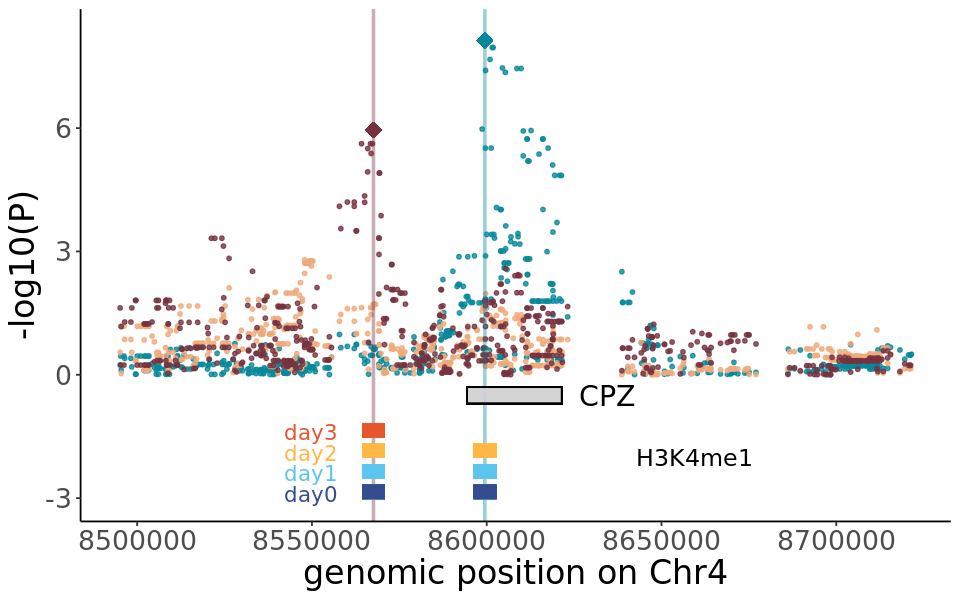

In [75]:
options(repr.plot.width = 8, repr.plot.height = 5)
p = p + theme_classic() 
p + theme(legend.position = "none", text = element_text(size = 20))
#                               axis.ticks.y = element_blank(), 
# #                               panel.border = element_rect(colour = "gray88", fill = NA, size = 0.75),
#                               panel.grid.major = element_line(size = 0.5, linetype = 'solid', colour = "gray95"), 
#                               panel.grid.minor = element_line(size = 0.25, linetype = 'solid',colour = "gray88"))

In [ ]:
##### save

In [76]:
svg(filename="/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/main_figures/figure_2D_Rplot.svg", 
    width=8, 
    height=5, 
    pointsize=12)

p + theme(legend.position = "none", text = element_text(size = 20))

dev.off()

png 
  2

In [ ]:
########################################################
########################################################
####################### Figure 4 #######################
########################################################
########################################################

In [ ]:
#### Figure 4B (pie)

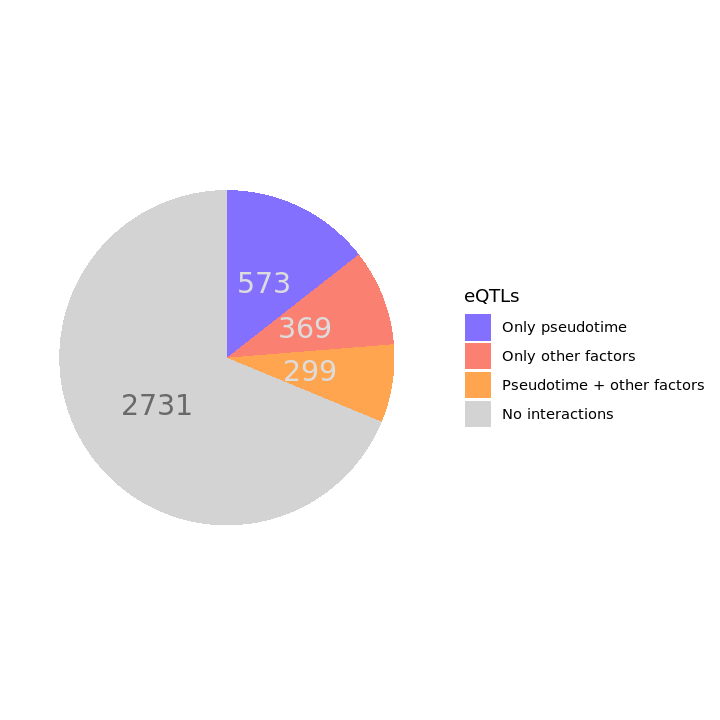

In [55]:
options(repr.plot.width = 6, repr.plot.height = 6)
df <- data.frame(
  eQTLs = as.factor(c("Only pseudotime", "Only other factors", "Pseudotime + other factors", "No interactions")),
  value = c(573, 369, 299, 2731)
  )
df$eQTLs = factor(df$eQTLs, levels(df$eQTLs)[c(3,2,4,1)])
bp <- ggplot(df, aes(x = "", y = value, fill = eQTLs)) + geom_bar(width = 1, stat = "identity")
pie <- bp + coord_polar("y", start = 0, direction = -1)

blank_theme <- theme_minimal()+
  theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.border = element_blank(),
  panel.grid = element_blank(),
  axis.ticks = element_blank()
  )

library(scales)
pie +  scale_fill_manual(values = c("lightslateblue", "salmon", "tan1", "lightgrey")) + 
    blank_theme + theme(axis.text.x = element_blank())  +
    geom_text(aes(label = value), position = position_stack(vjust = 0.5),
             size = 6, col = c("dimgray", "gainsboro", "gainsboro", "gainsboro"))

In [ ]:
### save

In [57]:
svg(filename="/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/main_figures/figure_4B_Rplot.svg", 
    width=6, 
    height=6, 
    pointsize=12)

pie +  scale_fill_manual(values = c("lightslateblue", "salmon", "tan1", "lightgrey")) + 
    blank_theme + theme(axis.text.x = element_blank())  +
    geom_text(aes(label = value), position = position_stack(vjust = 0.5),
             size = 6, col = c("dimgray", "gainsboro", "gainsboro", "gainsboro"))

dev.off()

png 
  2

In [ ]:
########################################################
########################################################
####################### Figure 5 #######################
########################################################
########################################################

In [ ]:
#### Figure 5A.1 (pseudo lines per day)

In [106]:
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))

In [107]:
range01 <- function(x){(x-min(x))/(max(x)-min(x))}
sce$pseudotime  <- range01(sce$PC1_top500hvgs)

In [108]:
sce_0 = sce[,sce$day == "day0"]
sce_1 = sce[,sce$day == "day1"]
sce_2 = sce[,sce$day == "day2"]
sce_3 = sce[,sce$day == "day3"]

In [109]:
df_pseudo0 = data.frame(pseudo = sce_0$pseudotime, donor = sce_0$donor_short_id, batch = sce_0$experiment)
df_pseudo1 = data.frame(pseudo = sce_1$pseudotime, donor = sce_1$donor_short_id, batch = sce_1$experiment)
df_pseudo2 = data.frame(pseudo = sce_2$pseudotime, donor = sce_2$donor_short_id, batch = sce_2$experiment)
df_pseudo3 = data.frame(pseudo = sce_3$pseudotime, donor = sce_3$donor_short_id, batch = sce_3$experiment)

In [110]:
# count the number of cells and get average pseudotime value per (donor, day) group 
pseudo0 <- df_pseudo0 %>% group_by(donor) %>% summarize(ncells = n(), avg_pseudo = mean(as.numeric(pseudo)))
pseudo1 <- df_pseudo1 %>% group_by(donor) %>% summarize(ncells = n(), avg_pseudo = mean(as.numeric(pseudo)))
pseudo2 <- df_pseudo2 %>% group_by(donor) %>% summarize(ncells = n(), avg_pseudo = mean(as.numeric(pseudo)))
pseudo3 <- df_pseudo3 %>% group_by(donor) %>% summarize(ncells = n(), avg_pseudo = mean(as.numeric(pseudo)))

In [111]:
# only trust average if done with at least 10 cells
N = 0
pseudo0 = pseudo0[pseudo0$ncells > N,]
pseudo1 = pseudo1[pseudo1$ncells > N,]
pseudo2 = pseudo2[pseudo2$ncells > N,]
pseudo3 = pseudo3[pseudo3$ncells > N,]

In [112]:
cbind(head(pseudo3[order(pseudo3$avg_pseudo),],20)," ",head(pseudo3[order(pseudo3$avg_pseudo, decreasing = T),],20))

donor,ncells,avg_pseudo,""" """,donor,ncells,avg_pseudo
<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<dbl>
datg_2,115,0.5399430,,heth_1,3,0.8362518
pelm_3,158,0.5941620,,pahc_4,109,0.8351720
guyj_2,111,0.6220795,,naah_2,130,0.8298561
oibg_1,140,0.6247041,,melw_2,80,0.8239757
bokz_5,114,0.6299543,,qunz_3,61,0.8224071
zapk_3,128,0.6411658,,hayt_1,204,0.8172756
bezi_1,3,0.6421778,,cicb_2,26,0.8159076
bima_1,31,0.6472056,,vils_1,55,0.8136694
pulk_1,88,0.6484528,,eipl_1,57,0.8127216


In [113]:
# combine
pseudo0_bis = inner_join(pseudo0, pseudo3, by = "donor", suffix = c(".day0",".day3"))
colnames(pseudo0_bis)[c(3,5)] <- c("avg_pseudo","diff_capacity")
pseudo1_bis = inner_join(pseudo1, pseudo3, by = "donor", suffix = c(".day1",".day3"))
colnames(pseudo1_bis)[c(3,5)] <- c("avg_pseudo","diff_capacity")
pseudo2_bis = inner_join(pseudo2, pseudo3, by = "donor", suffix = c(".day2",".day3"))
colnames(pseudo2_bis)[c(3,5)] <- c("avg_pseudo","diff_capacity")
pseudo3$diff_capacity = pseudo3$avg_pseudo
head(pseudo3)

donor,ncells,avg_pseudo,diff_capacity
<chr>,<int>,<dbl>,<dbl>
aowh_2,95,0.8065728,0.8065728
aoxv_3,71,0.8101674,0.8101674
bezi_1,3,0.6421778,0.6421778
bima_1,31,0.6472056,0.6472056
bokz_5,114,0.6299543,0.6299543
cicb_2,26,0.8159076,0.8159076


In [114]:
pseudo0_bis$day = "day0"
pseudo1_bis$day = "day1"
pseudo2_bis$day = "day2"
pseudo3$day = "day3"
cols = c("donor","day","avg_pseudo","diff_capacity")

In [115]:
# make dataframe for plotting 
df = rbind(pseudo0_bis[,cols], pseudo1_bis[,cols], pseudo2_bis[,cols], pseudo3[,cols])
nrow(df)
head(df[order(df$diff_capacity),])

[1] 398

donor,day,avg_pseudo,diff_capacity
<chr>,<chr>,<dbl>,<dbl>
datg_2,day0,0.12142486,0.539943
datg_2,day1,0.21406101,0.539943
datg_2,day2,0.41358173,0.539943
datg_2,day3,0.53994298,0.539943
pelm_3,day0,0.09648867,0.594162
pelm_3,day2,0.70000486,0.594162


In [117]:
length(unique(df$donor)) # donors with data (at least 10 cells) across all time points

[1] 108

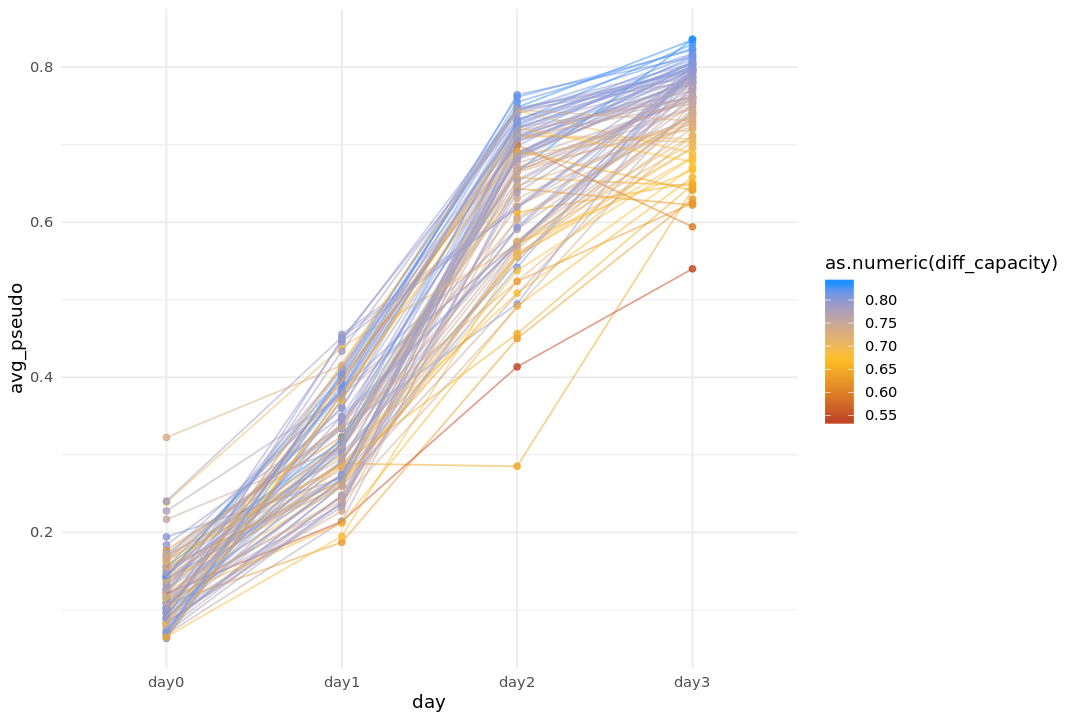

In [118]:
options(repr.plot.width = 9, repr.plot.height = 6)
mid <- min(df$diff_capacity) + 0.45*(max(df$diff_capacity)-min(df$diff_capacity))
p = ggplot(df, aes(x = day, y = avg_pseudo, col = as.numeric(diff_capacity), group = donor)) + 
#         scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral"))) +
#         scale_colour_gradientn(colors = brewer.pal("Spectral", n = 9)) +
        scale_colour_gradient2(midpoint = mid, low = "firebrick", mid = "goldenrod1", high = "dodgerblue", space = "Lab") +
#         scale_colour_gradient(low = "red", high = "blue") +
        geom_point(alpha = 0.8) + 
        geom_line(alpha = 0.5) +
        theme_minimal() #+ 
p
#         theme(panel.background = element_rect(fill = 'grey86'), 
#                                 panel.grid.major = element_line(size = 0.5, linetype = 'solid', colour = "gray90"), 
#                                 panel.grid.minor = element_line(size = 0.5, linetype = 'solid', colour = "gray90"),
#                                panel.border = element_rect(colour = "gray88", fill = NA, size = 0.75))

In [ ]:
### save

In [119]:
svg(filename="/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/main_figures/figure_5A_left_Rplot.svg", 
    width=9, 
    height=6, 
    pointsize=12)

p

dev.off()

png 
  2

In [ ]:
########################

In [ ]:
#### Figure 5A.2 (lines by diff. capacity)

In [120]:
pseudo3_batch <- df_pseudo3 %>% group_by(donor,batch) %>% summarize(ncells = n(), avg_pseudo = mean(as.numeric(pseudo)))

In [121]:
options(repr.plot.width = 7, repr.plot.height = 6)
df3 = pseudo3_batch
df3$diff_capacity = df3$avg_pseudo
p = ggplot(df3, aes(x = reorder(donor, -diff_capacity), y = diff_capacity, colour = diff_capacity)) + 
#         scale_colour_gradientn(colors = brewer.pal("Spectral", n = 9)) +
        scale_colour_gradient2(midpoint = mid, low = "firebrick", mid = "goldenrod1", high = "dodgerblue", space = "Lab") +
        geom_point(alpha = 0.8) + geom_line(alpha = 0.7) + 
        xlab("donors ordered by differentiation efficiency") + ylab("differentiation efficiency") +
        theme_bw() + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank(),
#                           axis.text.y = element_blank(), 
                              axis.ticks.y = element_blank(), 
                              panel.border = element_rect(colour = "gray88", fill = NA, size = 0.75),
                              panel.grid.major = element_line(size = 0.5, linetype = 'solid', colour = "gray95"), 
                              panel.grid.minor = element_line(size = 0.25, linetype = 'solid',colour = "gray88"))

In [122]:
### save

In [123]:
svg(filename="/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/main_figures/figure_5A_right_Rplot.svg", 
    width=7, 
    height=6, 
    pointsize=12)

p

dev.off()

png 
  2

In [ ]:
########################

In [ ]:
#### Figure 5B.1 (Manhattan plot mirrored)

In [247]:
x_chrom_predict_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/differentiation_prediction/differentiation_marker_LMM_w_donor_results.transcriptome_wide_scan_pseudotime.tsv"
x_chrom_predict = read.csv(x_chrom_predict_filename, sep = "\t")
head(x_chrom_predict)

timepoint1,gene1,timepoint2,gene2,coefficient,pval
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
day1,princ_curve_scaled01,day1,pseudotime,1.1162632,2.591249e-87
day2,princ_curve_scaled01,day2,pseudotime,0.9952129,6.260132e-74
day0,princ_curve_scaled01,day0,pseudotime,0.8314005,4.829511e-63
day1,princ_curve_frac,day1,pseudotime,0.1901435,7.754403e-60
day2,pseudotime_frac,day2,pseudotime,0.4731245,1.293367e-47
day2,princ_curve_frac,day2,pseudotime,0.5812520,8.365894e-43


In [248]:
x_chrom_predict_day0 = x_chrom_predict[x_chrom_predict$timepoint1 == "day0",]
x_chrom_predict_day0 = x_chrom_predict[x_chrom_predict$timepoint1 == "day0" & 
                                       x_chrom_predict$timepoint2 == "day3",]
x_chrom_predict_day0$hgnc_symbol = x_chrom_predict_day0$gene1
head(x_chrom_predict_day0)
nrow(x_chrom_predict_day0)

,timepoint1,gene1,timepoint2,gene2,coefficient,pval,hgnc_symbol
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
3888,day0,GRPR,day3,pseudotime,-0.06123211,8.675658e-07,GRPR
4069,day0,ZDHHC9,day3,pseudotime,-0.04286353,1.130310e-06,ZDHHC9
6191,day0,GPM6B,day3,pseudotime,-0.03571242,1.170422e-05,GPM6B
6269,day0,TMEM47,day3,pseudotime,-0.04089212,1.252561e-05,TMEM47
6613,day0,MOSPD2,day3,pseudotime,-0.05051760,1.647873e-05,MOSPD2
6895,day0,FAM92A1,day3,pseudotime,-0.03788094,2.079964e-05,FAM92A1


[1] 11252

In [249]:
## add gene info
gene_info_filename = "/nfs/leia/research/stegle/dseaton/genomes/hg19/annotation/Homo_sapiens.GRCh37.75.genes.bed"
gene_info = read.table(gene_info_filename)
colnames(gene_info) = c("chromosome_name","start_position","end_position","ensembl_gene_id","gene_biotype","strand")
head(gene_info)

chromosome_name,start_position,end_position,ensembl_gene_id,gene_biotype,strand
<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,11868,14412,ENSG00000223972,pseudogene,+
1,14362,29806,ENSG00000227232,pseudogene,-
1,29553,31109,ENSG00000243485,lincRNA,+
1,34553,36081,ENSG00000237613,lincRNA,-
1,52472,54936,ENSG00000268020,pseudogene,+
1,62947,63887,ENSG00000240361,pseudogene,+


In [250]:
gene_annos_filename = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/annos/combined_feature_id_annos.tsv"
gene_annos = read.csv(gene_annos_filename, sep = "\t")
head(gene_annos)

feature_id,chromosome,start,end,hgnc_symbol,combined_feature_id,ensembl_gene_id
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
ENSG00000000003_TSPAN6,X,99883667,99894988,TSPAN6,ENSG00000000003_TSPAN6,ENSG00000000003
ENSG00000000419_DPM1,20,49551404,49575092,DPM1,ENSG00000000419_DPM1,ENSG00000000419
ENSG00000000457_SCYL3,1,169818772,169863408,SCYL3,ENSG00000000457_SCYL3,ENSG00000000457
ENSG00000000460_C1orf112,1,169631245,169823221,C1orf112,ENSG00000000460_C1orf112,ENSG00000000460
ENSG00000001036_FUCA2,6,143815948,143832827,FUCA2,ENSG00000001036_FUCA2,ENSG00000001036
ENSG00000001084_GCLC,6,53362139,53481768,GCLC,ENSG00000001084_GCLC,ENSG00000001084


In [251]:
df.gene = inner_join(gene_info, gene_annos, by = "ensembl_gene_id")
head(df.gene)

chromosome_name,start_position,end_position,ensembl_gene_id,gene_biotype,strand,feature_id,chromosome,start,end,hgnc_symbol,combined_feature_id
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,14362,29806,ENSG00000227232,pseudogene,-,ENSG00000227232_WASH7P,1,14363,29806,WASH7P,ENSG00000227232_WASH7P
1,52472,54936,ENSG00000268020,pseudogene,+,ENSG00000268020_OR4G4P,1,52473,54936,OR4G4P,ENSG00000268020_OR4G4P
1,564441,564813,ENSG00000225972,pseudogene,+,ENSG00000225972_MTND1P23,1,564442,564813,MTND1P23,ENSG00000225972_MTND1P23
1,565019,566063,ENSG00000225630,pseudogene,+,ENSG00000225630_MTND2P28,1,565020,566063,MTND2P28,ENSG00000225630_MTND2P28
1,569075,569756,ENSG00000248527,pseudogene,+,ENSG00000248527_MTATP6P1,1,569076,569756,MTATP6P1,ENSG00000248527_MTATP6P1
1,860259,879955,ENSG00000187634,protein_coding,+,ENSG00000187634_SAMD11,1,860260,879955,SAMD11,ENSG00000187634_SAMD11


In [252]:
nrow(x_chrom_predict_day0)
df = left_join(x_chrom_predict_day0, df.gene, by = "hgnc_symbol")
nrow(df)

[1] 11252

[1] 11252

In [253]:
df = df[!(is.na(df$start_position)),]
nrow(df)

[1] 11149

In [254]:
add_TSS <- function(res){                                       
    res[res$strand == "+","TSS"] = res[res$strand == "+","start_position"]
    res[res$strand == "-","TSS"] = res[res$strand == "-","end_position"]
    res
}

In [255]:
df = add_TSS(df)

In [256]:
head(df$TSS)

[1]  16141678 128977885  13956757  34675405  14891562  94710788

In [257]:
df$corr_pval = p.adjust(df$pval, method = "BH")

In [258]:
nrow(df[df$corr_pval < 0.1,])

[1] 38

In [259]:
## features to highlight in the Manhattan plot
# significant, NOT on X chromosome
featuresOfInterestNotX = df[df$corr_pval < 0.1 & df$chromosome_name != "X", "feature_id"]
# significant, ON X chromosome
featuresOfInterestX = df[df$corr_pval < 0.1 & df$chromosome_name == "X", "feature_id"]

In [260]:
featuresOfInterestNotX

[1] "ENSG00000188343_FAM92A1"  "ENSG00000124762_CDKN1A"  
 [3] "ENSG00000154102_C16orf74" "ENSG00000087074_PPP1R15A"
 [5] "ENSG00000129566_TEP1"     "ENSG00000166233_ARIH1"   
 [7] "ENSG00000128731_HERC2"    "ENSG00000149922_TBX6"    
 [9] "ENSG00000143320_CRABP2"   "ENSG00000170633_RNF34"   
[11] "ENSG00000120910_PPP3CC"   "ENSG00000184840_TMED9"   
[13] "ENSG00000079739_PGM1"     "ENSG00000165861_ZFYVE1"  
[15] "ENSG00000130513_GDF15"    "ENSG00000197405_C5AR1"   
[17] "ENSG00000156453_PCDH1"    "ENSG00000034677_RNF19A"  
[19] "ENSG00000189144_ZNF573"   "ENSG00000112078_KCTD20"  
[21] "ENSG00000185236_RAB11B"

In [261]:
featuresOfInterestX

[1] "ENSG00000126010_GRPR"    "ENSG00000188706_ZDHHC9" 
 [3] "ENSG00000046653_GPM6B"   "ENSG00000147027_TMEM47" 
 [5] "ENSG00000130150_MOSPD2"  "ENSG00000158290_CUL4B"  
 [7] "ENSG00000184831_APOO"    "ENSG00000123595_RAB9A"  
 [9] "ENSG00000012174_MBTPS2"  "ENSG00000102172_SMS"    
[11] "ENSG00000102038_SMARCA1" "ENSG00000169446_MMGT1"  
[13] "ENSG00000205542_TMSB4X"  "ENSG00000182287_AP1S2"  
[15] "ENSG00000101901_ALG13"   "ENSG00000102225_CDK16"  
[17] "ENSG00000196440_ARMCX4"

In [262]:
example_X = rownames(sce)[grep("ZDHHC9",rownames(sce))]
example_X

[1] "ENSG00000188706_ZDHHC9"

In [263]:
## P value corresponding to largest significant corrected P 
df_sign = df[df$corr_pval < 0.1,]
mythresh = round(-log10(tail(df_sign[order(df_sign$corr_pval),],1)[,"pval"]),digits = 2)
mythresh

[1] 3.51

In [264]:
df = df[df$chromosome_name %in% c(1:22,"X"),]
# re-order chromosome names
df$CHR = as.factor(df$chromosome)
levels(df$CHR)
df$CHR =factor(df$CHR, levels(df$CHR)[c(1,12,16:22,2:11,13:15,23)])
levels(df$CHR)

[1] "1"  "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "2"  "20" "21" "22"
[16] "3"  "4"  "5"  "6"  "7"  "8"  "9"  "X"

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "X"

In [265]:
# Prepare the dataset
don <- df %>%   
  # Compute chromosome size
  group_by(CHR) %>% 
  summarise(chr_len = max(as.numeric(TSS))) %>% 
  # Calculate cumulative position of each chromosome
  dplyr::mutate(tot = cumsum(chr_len) - chr_len) %>%
  select(-chr_len) %>%  
  # Add this info to the initial dataset
  left_join(df, ., by = c("CHR" = "CHR")) %>%  
  # Add a cumulative position of each SNP
  dplyr::arrange(CHR, TSS) %>%
  dplyr::mutate( BPcum = TSS + tot) %>%
  # Add highlight and annotation information
  dplyr::mutate( is_highlight1 = ifelse(feature_id %in% featuresOfInterestNotX, "yes", "no")) %>%
  dplyr::mutate( is_highlight2 = ifelse(feature_id %in% featuresOfInterestX, "yes", "no")) %>%
  # specific examples
  dplyr::mutate( is_highlight3 = ifelse(feature_id == example_X, "yes", "no")) %>%
  # Filter SNP to make the plot lighter
  dplyr::filter(-log10(pval) > 0)

In [266]:
nrow(don[don$corr_pval < 0.1 & don$CHR == 'X',])
nrow(don[don$corr_pval < 0.1 & don$CHR != 'X',])

[1] 17

[1] 21

In [269]:
# Prepare X axis
axisdf <- don %>% group_by(CHR) %>% summarize(center =( max(BPcum) + min(BPcum) ) / 2 )

In [294]:
# Make the plot
p <- ggplot(don, aes(x = BPcum, y = -log10(pval)*sign(coefficient), text = ""))

In [295]:
p = p + # Show all points
    geom_point( aes(color = as.factor(CHR)), alpha = 0.3, size = 0.8) +
    scale_color_manual(values = rep(c("grey75", "dimgrey"), 22 )) +
    
    # custom X axis:
    scale_x_continuous( label = axisdf$CHR, breaks = axisdf$center ) +
    scale_y_continuous(expand = c(0, 0) ) +     # remove space between plot area and x axis
    ylim(-9,9)+ 
    xlab("gene location (TSS)") +
    ylab("-log10(P) X \neffect direction")
# p

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


In [272]:
nrow(don[don$corr_pval < 0.1 & don$CHR == 'X',])
nrow(don[don$corr_pval < 0.1 & don$CHR != 'X',])

[1] 17

[1] 21

In [296]:
p <- p +  
     # Add highlighted points
    geom_point(data = subset(don, is_highlight1 == "yes"), col = "dodgerblue", size = 1.2, alpha = 0.3) +
    geom_point(data = subset(don, is_highlight2 == "yes"), col = "darkred", size = 1.2, alpha = 0.3) +
    geom_point(data = subset(don, is_highlight3 == "yes"), col = "darkorange3", size = 1.9) 
# p

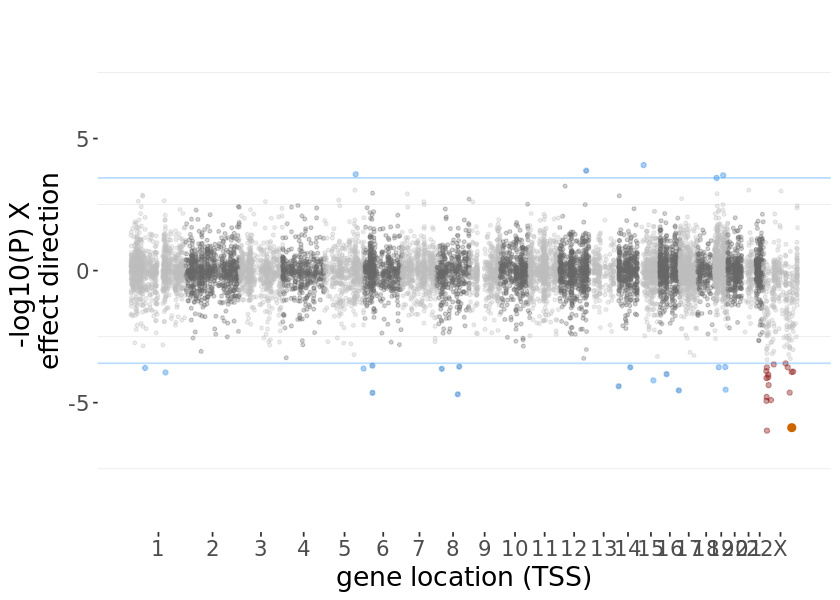

In [297]:
#+
#     geom_point(data = subset(don, is_highlight4 == "yes"), col = "#344d90", size = 1.8) +
 
#     geom_point(data = subset(don, is_highlight3 == "yes"), col = "green", size = 3) +
    
    # Add significance threshold
 p = p +   geom_hline(yintercept = mythresh, alpha = 0.3, col = "dodgerblue") +
    geom_hline(yintercept = -mythresh, alpha = 0.3, col = "dodgerblue") +
    
    # Custom the theme:
    theme_bw() +
    theme( 
      legend.position="none",
      panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      panel.grid.major.y = element_blank(),
      text = element_text(size = 16)
    ) 


options(repr.plot.width = 7, repr.plot.height = 5)
p

In [280]:
### save

In [281]:
svg(filename="/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/main_figures/figure_5B_left_Rplot.svg", 
    width=7, 
    height=6, 
    pointsize=12)

p

dev.off()

png 
  2

In [ ]:
########################

In [ ]:
#### Figure 5B.2 (scatterplot example)

In [143]:
ZDHHC9_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/differentiation_prediction/differentiation_marker_LMM_w_donor_results_subset_of_day0_markers_data/day0_ZDHHC9_day3_pseudotime.tsv"
ZDHHC9 = read.csv(ZDHHC9_filename, sep = "\t")
head(ZDHHC9)

experiment,donor,phenotype,fixed_effect,residual
<chr>,<chr>,<dbl>,<dbl>,<dbl>
expt_22,eoxi,0.8028691,5.407826,0.016888133
expt_22,fawm,0.7074314,5.376837,-0.002927534
expt_22,iudw,0.6711877,6.052343,-0.010452791
expt_22,oebj,0.6917951,6.125818,-0.006174083
expt_22,oojs,0.7616687,6.019017,0.008333726
expt_22,pulk,0.6649738,5.565003,-0.008964453


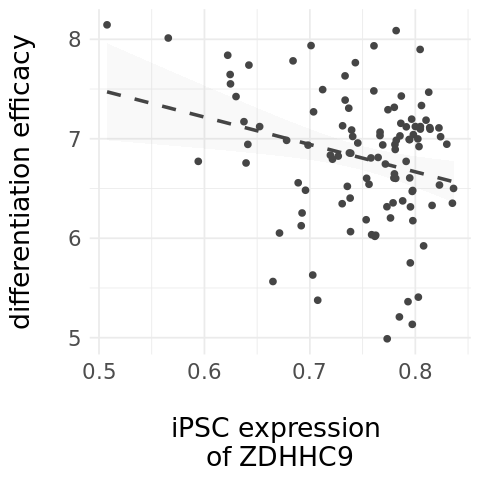

In [144]:
options(repr.plot.width = 4, repr.plot.height = 4)
col = "gray27"
p = ggplot(ZDHHC9, aes(x = phenotype, y = fixed_effect)) + geom_point(col = col)
p = p + stat_smooth(colour = col, linetype = 2, method = "lm", alpha = 0.05)
p = p + theme_minimal() 
p = p + xlab(paste0("\niPSC expression \nof ZDHHC9")) + ylab("differentiation efficacy\n")
p = p + theme(plot.title = element_text(hjust = 0.5, colour = col),
               text = element_text(size = 16))
p

In [145]:
### save

In [146]:
svg(filename="/hps/nobackup/stegle/users/acuomo/all_scripts/sc_endodiff/main_figures/figure_5B_right_Rplot.svg", 
    width=4, 
    height=4, 
    pointsize=12)

p

dev.off()

png 
  2